In [22]:
%pip install numpy matplotlib tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 32.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 46.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy

## Dataset

The dataset selected was **cifar10**, this allow us to classify different kind of things in a range of 0 to 9:

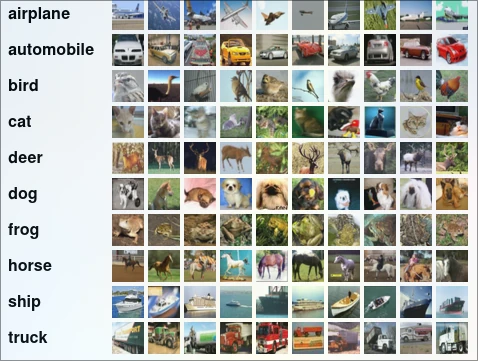

This is appropied to the **convolutional neural network**, because show how a model learn and can differenciate from a **automobile** to a **frog**. 

Similarly it is interesting cause the dataset is with colors, that makes we need to normalize and add parameter to the size of images (**32 x 32 pixels x 3**).

https://keras.io/api/datasets/cifar10/

## 1. Dataset Exploration (EDA)

In [46]:
(train_X, train_Y),(test_X, test_Y) = cifar10.load_data()

## 1.1 Dataset Size - 1.2. Image Dimensions and channels

Cifar10 is a dataset of **50,000 color training images** and **10,000 test images,** labeled over **10 categories**.

The dataset is divided into five training batches and one test batch, each with 10,000 images. 

The test batch contains exactly 1,000 randomly-selected images from each class.

The training batches contain the remaining images in random order, but some training batches may contain more images from one class to another. Between them, the training batches contain exactly 5,000 images from each class.

The classes are completely mutually exclusive. There is no overlap between **automobiles** and **trucks**. "Automobile" includes **sedans**, **SUVs**, things of that sort.

**Truck** includes only big trucks. Neither includes pickup trucks.

The image dimensions are **32 x 32 pixels**

The channels are **RGB** because are color images, so we need to multiply the dimensions for the respective channels, in this case (**3**).

In [47]:
print('Training Data Shape', train_X.shape, train_Y.shape)
print('Test Data Shape', test_X.shape, test_Y.shape)

Training Data Shape (50000, 32, 32, 3) (50000, 1)
Test Data Shape (10000, 32, 32, 3) (10000, 1)


We can observe, how it is distribuited the respective classes, where we have a 10 **output possibilities**.

In [39]:
classes = np.unique(train_Y)
nClasses = len(classes)

print('Output possibilities', classes)
print('Total of classes', nClasses)

Output possibilities [0 1 2 3 4 5 6 7 8 9]
Total of classes 10


## 1.3 Examples of samples per class

Similarly, through matplot we can visualize some images and see what label has.

Text(0.5, 1.0, 'Ground Truth: [8]')

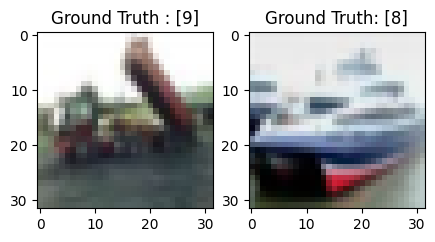

In [40]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[2,:,:])
plt.title("Ground Truth : {}".format(train_Y[2]))

plt.subplot(122)
plt.imshow(test_X[1,:,:])
plt.title("Ground Truth: {}".format(test_Y[1]))

## 1.4 Preprocessing Needed

In [41]:
train_X = train_X.reshape(-1, 32, 32, 3)
test_X = test_X.reshape(-1, 32, 32, 3)

In [42]:
train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)
train_X = train_X / 255
test_X = test_X / 255

In [43]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original Label: ', train_Y[0])
print('One hot encoding',train_Y_one_hot[0])

Original Label:  [6]
One hot encoding [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [57]:
train_X_normalize, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=15)

train_X_normalize.shape,valid_X.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

## 2. Baseline Model (Non-Convolutional)

Implement a baseline neural network without convolutional layers, e.g.:

- Flatten + Dense layers


In [69]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [70]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [71]:
model.fit(train_X_normalize, train_label, epochs=3, batch_size=32)

Epoch 1/3


2026-02-07 13:51:44.191687: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1120 - loss: 14.5356
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0962 - loss: 2.3027
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0973 - loss: 2.3029


In [72]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,183,904 (4.52 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 789,270 (3.01 MB)

## 3. Convolutional Architecture Design

Design a CNN from scratch, not copied from a tutorial.

You must explicitly define and justify:

- Number of convolutional layers

- Kernel sizes

- Stride and padding choices

- Activation functions

- Pooling strategy (if any)

The architecture should be simple but intentional, not deep for its own sake.

## 4. Controlled Experiments on the Convolutional Layer

Choose one aspect of the convolutional layer and explore it systematically.

Examples (pick one):

- Kernel size (e.g. 3×3 vs 5×5)

- Number of filters

- Depth (1 vs 2 vs 3 conv layers)

- With vs without pooling

- Effect of stride on feature maps

Keep everything else fixed.

Report:

- Quantitative results (accuracy, loss)

- Qualitative observations

- Trade-offs (performance vs complexity)


## 5. Interpretation and Architectural Reasoning

Answers in your own words:

- Why did convolutional layers outperform (or not) the baseline?

- What inductive bias does convolution introduce?

- In what type of problems would convolution not be appropriate?




## 6. Deployment in SageMaker

- Train the model in Sagemaker

- Deploy the model to a sagemaker endpoint
